# <center> TAPE
### <center> Visualizar BERT embeddings

In [1]:
import numpy as np
import pandas as pd
import altair  as alt
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

# Cargar datos

In [46]:
df = pd.read_csv("../data/macros.csv", index_col="Uniprot Code")
df.head()

,Tipo de Macro,Secuencia
Uniprot Code,,
O28751,AF-1521-like,MEVLFEAKVGDITLKLAQGDITQYPAKAIVNAANKRLEHGGGVAYA...
D3RWS7,AF-1521-like,MEVEVVRELEMDKLKVKLAGGDITKYPAEAIVNAANKYLEHGGGVA...
D2RH24,AF-1521-like,MVVKKFGSVEVVLEKGDITKYPAEAIVNAANKYLEHGGGVALAIAK...
A0A0F7ICE9,AF-1521-like,MKPEVVLRFSGVEVRLVQGDITKYPAEAIVNAANRHLEHGGGVAYA...
A0A075LQ95,AF-1521-like,MNLTELTFGNLTFKLAQGDITKLPAEAIVNAANKYLEHGGGVALAI...


In [3]:
labels = df["Tipo de Macro"].values
embs = np.load("macros_bert.npy")
embs.shape

(165, 768)

## Visualización con reducción dimenssional (PCA, tSNE y UMAP)

In [4]:
def plot_multidimensional(x, y, method):

    # Libraries
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE
    import umap
    
    # Compute
    if method=="pca":    comps = PCA().fit_transform(x)
    elif method=="tsne": comps = TSNE().fit_transform(x)
    elif method=="umap": comps = umap.UMAP().fit_transform(x)
    
    df_dimRed = pd.DataFrame({'Componente 1': comps[:, 0],  'Componente 2': comps[:, 1], "y": y})

    
    # Plot
    selection = alt.selection_multi(fields=['y'])
    color = alt.condition(selection, alt.Color('y:N', legend=None), alt.value('lightgray'))

    base = alt.Chart(df_dimRed).add_selection(selection)

    scatter = base.mark_circle(size=60).encode(
        x="Componente 1", y="Componente 2", color=color, tooltip="y"
    ).properties( width=400, height=400).interactive()

    legend = base.mark_rect().encode(
        y=alt.Y('y:N', axis=alt.Axis(orient='right')),
        color=color
    )

    return scatter | legend

In [5]:
plot_multidimensional(embs, df["Tipo de Macro"], method="pca")

alt.HConcatChart(...)

In [6]:
plot_multidimensional(embs, df["Tipo de Macro"], method="tsne")

alt.HConcatChart(...)

In [7]:
plot_multidimensional(embs, df["Tipo de Macro"], method="umap")

alt.HConcatChart(...)

## Clustering jerárquico (Agglomerative clustering con distancias coseno y euclidea)

### Linkage methods
- `single`
- `complete`
- `average`
- `weighted`
- `centroid`
- `median`
- `ward`

### Distancias (metric)
- `braycurtis`
- `canberra`
- `chebyshev`
- `cityblock`
- `correlation`
- `cosine`
- `dice`
- `euclidean`
- `hamming`
- `jaccard`
- `jensenshannon`
- `kulsinski`
- `mahalanobis`
- `matching`
- `minkowski`
- `rogerstanimoto`
- `russellrao`
- `seuclidean`
- `sokalmichener`
- `sokalsneath`
- `sqeuclidean`
- `yule`

In [67]:
s = list(set(df["Tipo de Macro"].values))
s

['MacroD-like',
 'SUD-M-like',
 'POA1-like',
 'Core-histone-macro-H2A',
 'DarG-like',
 'PARG-like',
 'PARP-like-PARP15',
 'PARP-like-PARP9b',
 'SAV0325-like-Macro',
 'Macro2-type',
 'SAV0325-like-Macro-Sirt',
 'SCO6735-like',
 'TARG1-like',
 'PARP-like-PARP14',
 'Virus-type',
 'GDPA2-like',
 'AF-1521-like',
 'ALC1-like']

In [69]:
s.index("ALC1-like")

17

In [64]:
{{x}: y for x, y in enumerate(s)}

TypeError: unhashable type: 'set'

In [81]:
def hierarchical_clustering(embs, labels,
                            distance="euclidean", # cosine
                            method='ward', # average
                            threshold=0,
                            orientation="top", # left
                            figsize=(8,32)):
    
    from scipy.cluster import hierarchy
    
    links = hierarchy.linkage(embs, method, distance)
    
    plt.figure(figsize=figsize)
    hierarchy.dendrogram(links,
                         color_threshold=threshold,
                         above_threshold_color='grey',
                         labels=labels,
                         orientation=orientation,
                         leaf_font_size=10)
    plt.title("Hierarchical Clustering ("+distance+" distance)")
    
    ax = plt.gca()
    if orientation=="top":
        plt.ylabel("Distance ("+distance+")")
        plt.axhline(threshold, color='k', linestyle='--')
        tick_lbls = ax.get_xmajorticklabels()
    else:
        plt.xlabel("Distance ("+distance+")")
        plt.axvline(threshold, color='k', linestyle='--')
        tick_lbls = ax.get_ymajorticklabels()
    
    # COLOR LABELS
    label_uniques = list(set(labels))
    palette = plt.cm.get_cmap("tab20", len(label_uniques))
    num=0
    for lbl in tick_lbls:
        #print(type(lbl), lbl.get_text(), labels_serie.values[num])
        val=label_uniques.index(lbl.get_text())
        lbl.set_color(palette(val))
        num+=1
    
    plt.show()

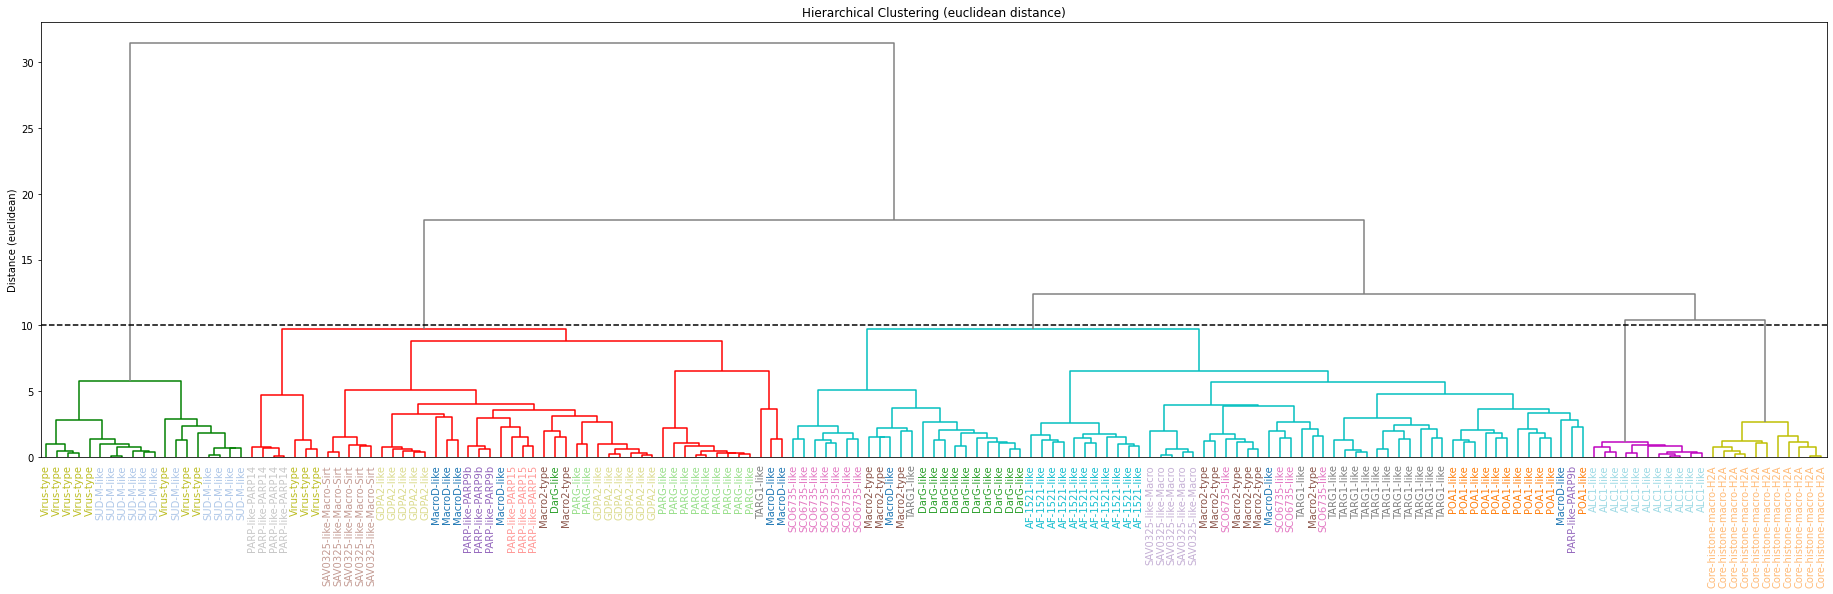

In [82]:
hierarchical_clustering(embs, labels, distance="euclidean", method='ward',
                        threshold=10, orientation="top", figsize=(32,8))

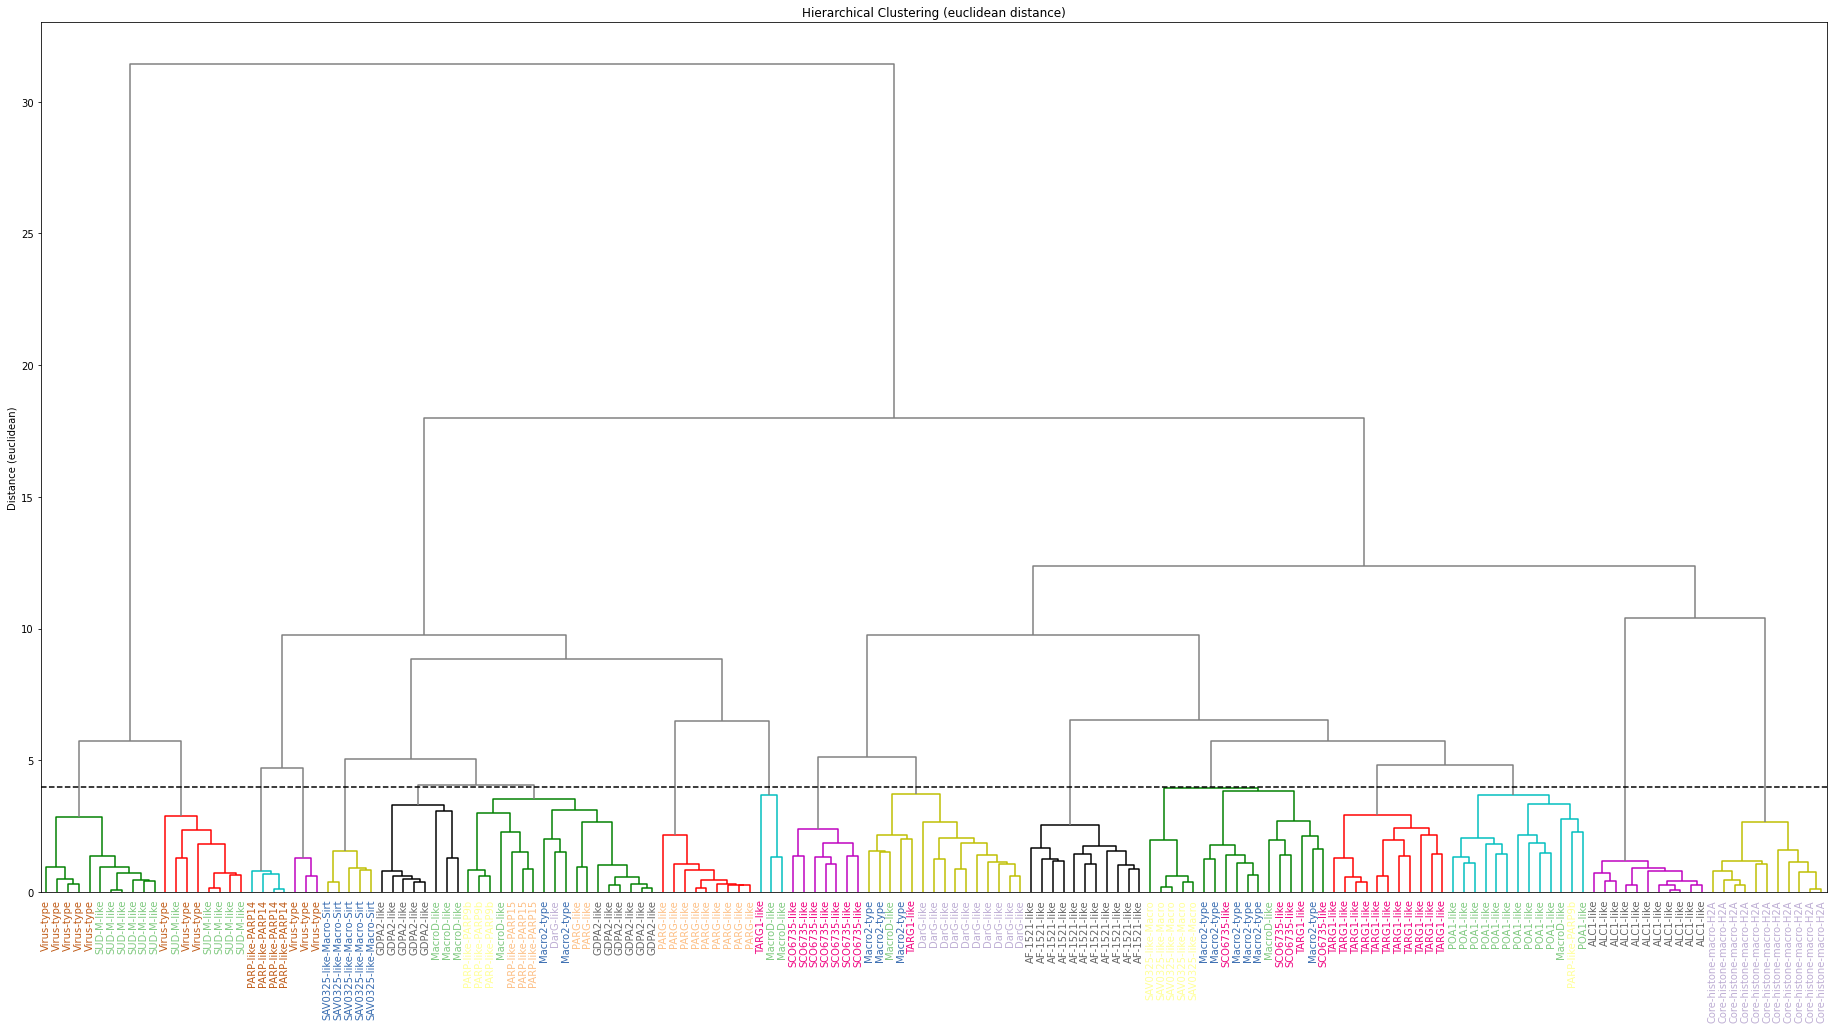

In [74]:
hierarchical_clustering(embs, df["Tipo de Macro"], distance="euclidean", method='ward',
                        threshold=4, orientation="top", figsize=(32,16))

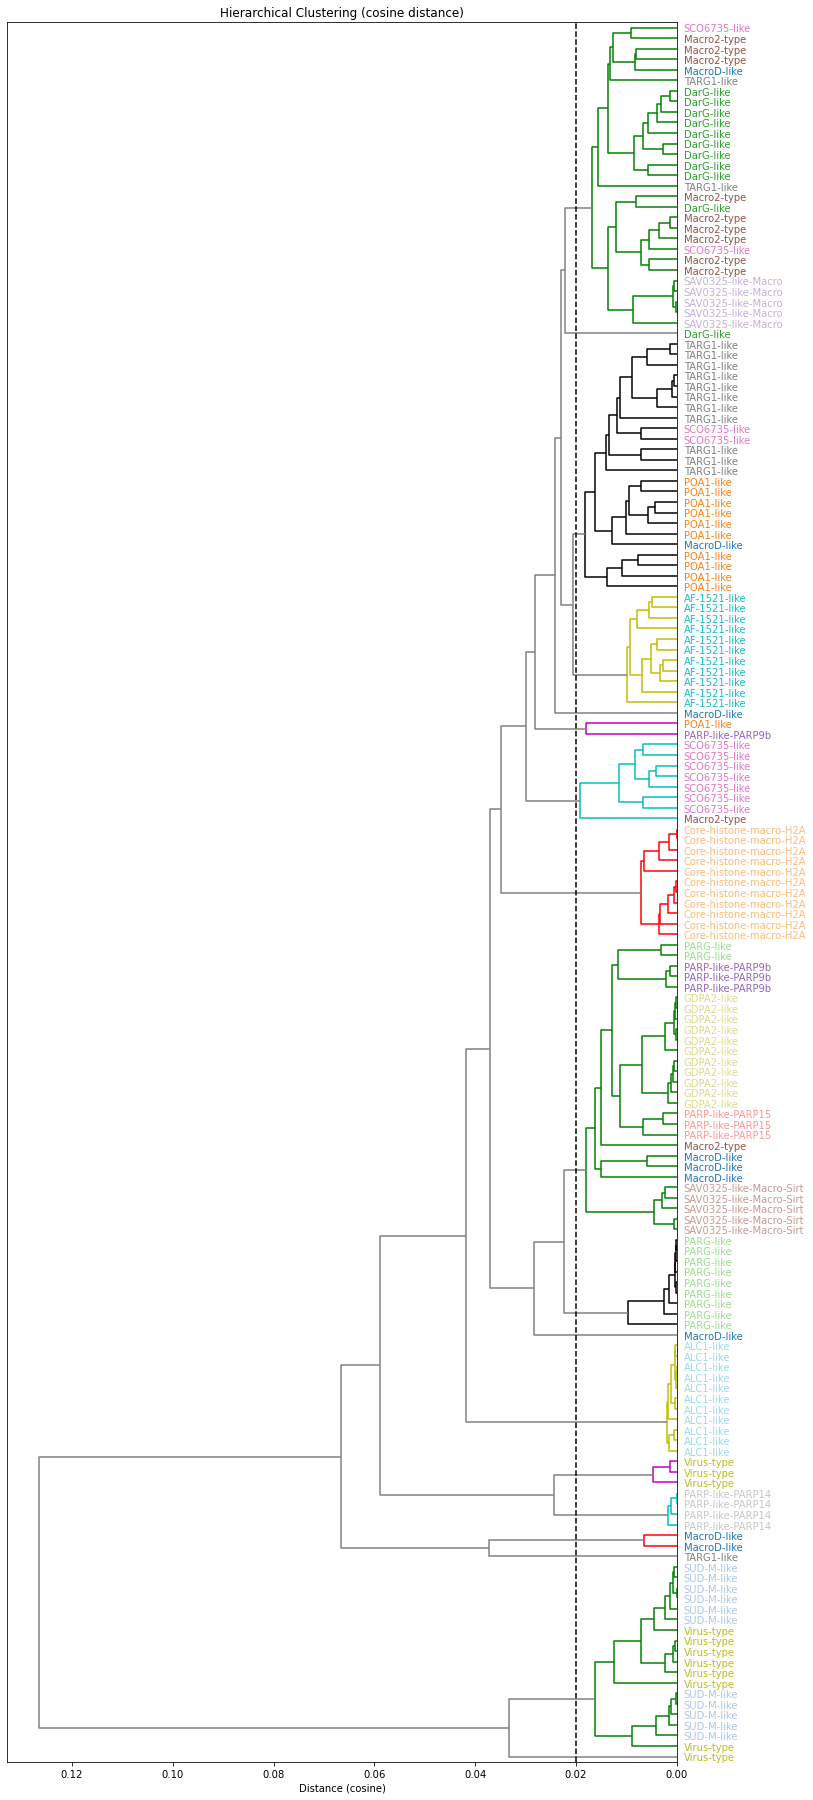

In [87]:
hierarchical_clustering(embs, df["Tipo de Macro"], distance="cosine", method='average',
                        threshold=0.02, orientation="left", figsize=(12,32))

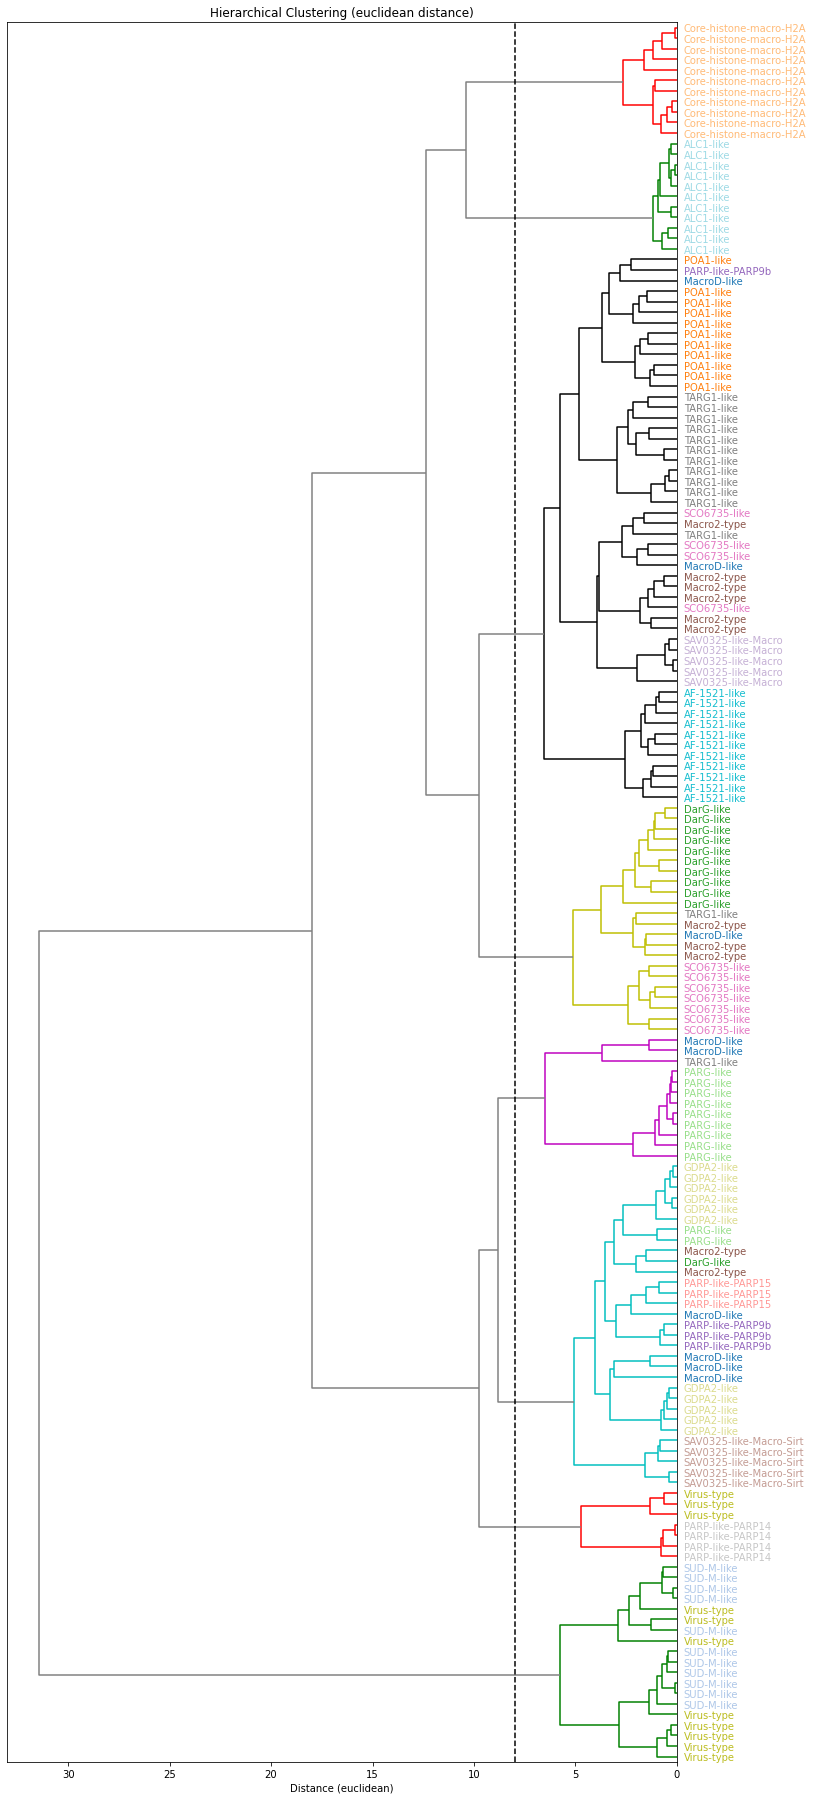

In [86]:
hierarchical_clustering(embs, labels, distance="euclidean", method='ward',
                        threshold=8, orientation="left", figsize=(12,32))

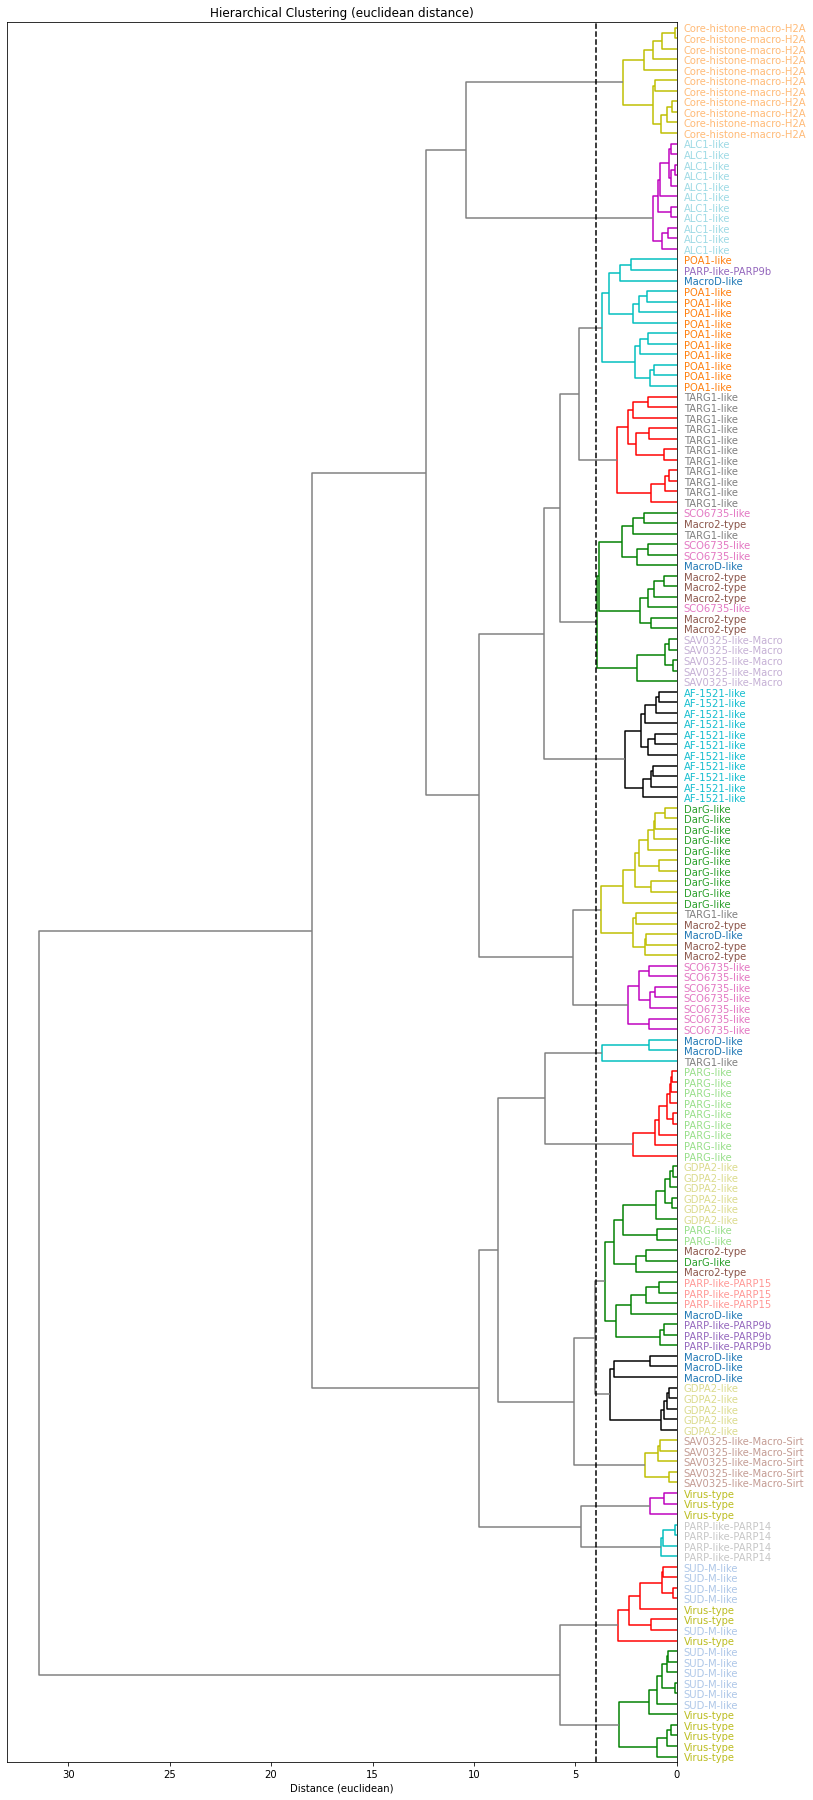

In [84]:
hierarchical_clustering(embs, labels, distance="euclidean", method='ward',
                        threshold=4, orientation="left", figsize=(12,32))